In [1]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.ndimage import interpolation
from statsmodels.stats.anova import AnovaRM
import time
import sys
import math
import pylab as py
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import scipy.stats as sci 
import seaborn as sns
import statannot
import json

# sns.set_style(style='whitegrid')

In [2]:
def GetAng(a,b,c):
    ang = math.degrees(math.atan2(c[1] - b[1], c[0] - b[0]) - math.atan2(a[1] - b[1], a[0] - b[0]))
    return 360 - (ang + 360 if ang < 0 else ang)

In [3]:
def ResizeArray(data, newSize):
    x = data
    i = newSize

    lenX = len(x)

    if lenX == 0:
        lenX = 1
        z = i / lenX
    else:
        z = i / lenX
        x_int = interpolation.zoom(x,z)

    return x_int

In [4]:
def ReadFiles(path, files):
    # Define data frame variable
    df = None 
    startTime = time.time()
  
    print('Number of files: ', len(files))
    
    # Load each file into the data frame 
    for i in range(len(files)): 
    
        if ".json" in files[i] and "Phase" in files[i] and "QNumber" not in files[i]:    
        # if "txt.json" in files[i] and "Phase" in files[i]:
              # print(files[i])

            # elapsedTime = time.time() - startTime
            # print('Time passed: ', np.round(elapsedTime), '\t sec \r')

            # Extract file name info and add to the dataframe 
            fileWords = files[i].split("_")

            # Extract phase 
            idx = fileWords.index("Phase")
            phase = fileWords[idx + 1]

            # Extract user ID 
            idx = fileWords.index("trial")
            userID = fileWords[idx - 1]

            # Add trial number to data frame 
            try:
#                 print('Path and File: ', [path + '/' + files[i]])
                tmpDF = pd.read_json(path + '/' + files[i])
                tmpDF.insert(0, "Phase", phase, True)
                tmpDF.insert(0, "UserID", userID, True)

                if df is None:
                    df = tmpDF
                else:
                    df = pd.concat((df, tmpDF))
            except Exception as e:
                print('My_Err: ', e)
    return df

In [5]:
def ReadFiles(path, files):
    # Define data frame variable
    df = None 
    startTime = time.time()
  
    print('Number of files: ', len(files))
    
    # Load each file into the data frame 
    for i in range(len(files)): 
    
        if ".json" in files[i] and "Phase" in files[i] and "QNumber" not in files[i]:    
        # if "txt.json" in files[i] and "Phase" in files[i]:
              # print(files[i])

            # elapsedTime = time.time() - startTime
            # print('Time passed: ', np.round(elapsedTime), '\t sec \r')

            # Extract file name info and add to the dataframe 
            fileWords = files[i].split("_")

            # Extract phase 
            idx = fileWords.index("Phase")
            phase = fileWords[idx + 1]

            # Extract user ID 
            idx = fileWords.index("trial")
            userID = fileWords[idx - 1]

            # Add trial number to data frame 
            try:
#                 print('Path and File: ', [path + '/' + files[i]])
                tmpDF = pd.read_json(path + '/' + files[i])
                tmpDF.insert(0, "Phase", phase, True)
                tmpDF.insert(0, "UserID", userID, True)

                if df is None:
                    df = tmpDF
                else:
                    df = pd.concat((df, tmpDF))
            except Exception as e:
                print('My_Err: ', e)
    return df

In [6]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

#     print list
#     for x in unique_list:
#         print (x)

    return unique_list

In [10]:
# path = "H:/Project/SubEscape/SubEscape_Data_Analysis/Data_Subset/"
path = "C:/Users/ObiPC/Documents/Projects/SubEscape/SubEscape_Data_Analysis/Data_Subset/"

### Load data

In [11]:
startTime = time.time()

fileLoaded = False
# try:
#     df_all = pd.read_pickle('SubData_All.pkl')
#     fileLoaded = True
# except Exception as e:
#     print('File not found error: ', e)
#     fileLoaded = False

if not fileLoaded:
    # path = "C:/Users/ObiPC/Documents/Projects/SubEscape/SubEscape_Data_Analysis/Data/"
#     path = "H:/Project/SubEscape/SubEscape_Data_Analysis/Data/"
#     path = "H:/Project/SubEscape/SubEscape_Data_Analysis/Data_Subset/"

    folders = os.listdir(path)
    folderNames = unique(folders)
    df = None 
    df_all = None

    for f in folderNames:

        folderWords = str.split(f,'_')
        if '444' in folderWords[2]:
            continue
        else:
            ptxIDs = folderWords[1]
            age = folderWords[2]
            sex = folderWords[3]
            hand = folderWords[4]
            group = folderWords[5]
            trial = int(folderWords[9])

            try:
                tmpDF = pd.read_json(path + f, orient='index')

                # Extract pose data from each of the metrics 
                frame = []
                joint = []
                xPos = []
                yPos = []
                zPos = []
                rot = []
                for i in np.arange(len(tmpDF.loc['fingData'].values[0])):
                    metricParts = str.split(tmpDF.loc['fingData'].values[0][i],';')
                    frame.append(int(metricParts[0]))
                    joint.append(metricParts[1])
                    xPos.append(float(metricParts[2]))
                    yPos.append(float(metricParts[3]))
                    zPos.append(float(metricParts[4]))
                    rot.append(float(metricParts[5]))

                data = {'Fame' : frame,
                       'Joint' : joint,
                       'xPos' : xPos,
                       'yPos' : yPos,
                       'zPos' : zPos,
                       'rot' : rot,}

                tmpDF2 = pd.DataFrame(data)
                tmpDF2.insert(0,'PtxID',ptxIDs)
                tmpDF2.insert(1,'trial',trial)
                tmpDF2.insert(2,'group',group)
                tmpDF2.insert(3,'hand',hand)
                tmpDF2.insert(4,'age',age)
                tmpDF2.insert(5,'sex',sex)

                # Concatenate all resultant data frames into one parent data frame 
                if df_all is None:
                    df_all = tmpDF2
                else:
                    df_all = pd.concat([df_all, tmpDF2])          

    #             # Concatenate all resultant data frames into one parent data frame 
    #             if df is None:
    #                 df = tmpDF
    #             else:
    #                 df = pd.concat([df, tmpDF])
            except Exception as e:
                print('Ptx: ', ptxIDs,' Warning: ', e)
#     df

elapsedTime = np.round(time.time() - startTime) / 60.0
print('Processing time: ', elapsedTime, ' minutes')

Processing time:  10.65  minutes


In [12]:
df_all.to_pickle('SubData_All_Subset.pkl')

In [13]:
# df_all = pd.read_pickle('SubData_All_Subset.pkl')

In [14]:
print('Num participants: ', len(pd.unique(df_all['PtxID'])))
print('Groups: ', pd.unique(df_all['group']))

Num participants:  10
Groups:  ['Reward' 'NoReward']


In [15]:
mask = (df_all['PtxID'] == 'rN464901337br235') & (df_all['trial'] == '38') & (df_all['Joint'] == 'b_l_index1')
# plt.plot(df_all[mask]['rot'])

In [16]:
df_all[mask]['rot']

Series([], Name: rot, dtype: float64)

In [17]:
# Compute average age
ageString = pd.unique(df_all['age'])
agesf = [int(i) for i in ageString] 
ages = [ (np.nan * x) if x>80 else x for x in agesf]

In [18]:
print('Number of participants: ', len(pd.unique(df_all['PtxID'])))
print('Groups: ', len(pd.unique(df_all['group'])))
print('Average Age: ', np.round(np.nanmean(ages)))

Number of participants:  10
Groups:  2
Average Age:  26.0


In [19]:
ptexes = pd.unique(df_all['PtxID'])

In [20]:
jointsOfInterest = ['b_l_thumb1', 'b_l_thumb2', 'b_l_thumb3',
                    'b_l_index1', 'b_l_index2', 'b_l_index3',
                    'b_l_middle1', 'b_l_middle2', 'b_l_middle3',
                    'b_l_ring1', 'b_l_ring2', 'b_l_ring3',
                    'b_l_pinky1', 'b_l_pinky2', 'b_l_pinky3',
                    'b_l_wrist']

print('Finger joints: ', pd.unique(df_all['Joint']))
print('Numb. all joints: ', len(pd.unique(df_all['Joint'])))
print('Numb. main joints: ', len(jointsOfInterest))

Finger joints:  ['b_l_thumb1' 'b_l_thumb2' 'b_l_thumb3' 'l_thumb_finger_tip_marker'
 'b_l_index1' 'b_l_index2' 'b_l_index3' 'l_index_finger_tip_marker'
 'b_l_middle1' 'b_l_middle2' 'b_l_middle3' 'l_middle_finger_tip_marker'
 'b_l_ring1' 'b_l_ring2' 'b_l_ring3' 'l_ring_finger_tip_marker'
 'b_l_pinky1' 'b_l_pinky2' 'b_l_pinky3' 'l_pinky_finger_tip_marker'
 'b_l_wrist']
Numb. all joints:  21
Numb. main joints:  16


In [21]:
def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [22]:
# vn265606624Yv403
# kL32782760pb805
# CL78462911bI451
ptexes

array(['Ir247397260DX268', 'vn265606624Yv403', 'kL32782760pb805',
       'Ai275415234NZ493', 'CL78462911bI451', 'XY13546991Od507',
       'iA94696354Ww734', 'UJ22372929Ma480', 'nN48787345GM446',
       'rN464901337br235'], dtype=object)

In [56]:
# metricParts = str.split(tmpDF.loc['dialData'].values[0][100],';')
# metricParts

ptx = ptexes[4]
trl = [35]
childJoints = jointsOfInterest[:-1]
graphData = False

for t in trl:
    
    invX = 0
    invY = 0
    invZ = 0
    
    # Reconstruct Original Dial Angles from relative finger joints and wrist positions 
    for j in childJoints:
        
        mask = (df_all['PtxID'] == ptx) & (df_all['trial'] == t) & (df_all['Joint'] == j)
        maskWrist = (df_all['PtxID'] == ptx) & (df_all['trial'] == t) & (df_all['Joint'] == jointsOfInterest[-1]) 

        invX +=  np.sqrt((df_all[mask]['xPos'].values - df_all[maskWrist]['xPos'].values) ** 2)
        invY +=  np.sqrt((df_all[mask]['yPos'].values - df_all[maskWrist]['yPos'].values) ** 2)
        invZ +=  np.sqrt((df_all[mask]['zPos'].values - df_all[maskWrist]['zPos'].values) ** 2)
            
    cA_Temp = np.nansum([invX * 0.067, (invY * 0.067)], axis=0)
    currentAngle = np.nansum([cA_Temp, (invZ * 0.067)], axis=0)
    


#     currentAngleMined = []
#     for c in currentAngle:
#         if c < 0.045:
#             currentAngleMined.append(0.045)
#         else:
#             currentAngleMined.append(c)
    
#     currentAngleMaxed = []
#     for c in currentAngle:
#         if c > 0.115:
#             currentAngleMaxed.append(0.115)
#         else:
#             currentAngleMaxed.append(c)
            
    leftMin = np.nanmin(currentAngle) # leftMin = 0.045
    leftMax = np.nanmax(currentAngle) # leftMax = 0.115
    dialAngle = []
    
    for cA in currentAngle:
        dialAngle.append(translate(cA, leftMin, leftMax, 0.1, 179.9))

    dialAngle = [i + 7.5 for i in dialAngle] # Add offset value of 7.5 degrees to the reconstructed dial angle to match the original Unity environment and script (see MoveDial.cs)



# Vector3 currentHandData = new Vector3();
# for (int i = 0; i < virtualDigits.Length - 1; i++)
# {
#     currentHandData += virtualDigits[16].InverseTransformPoint(virtualDigits[i].position);
# }
# float currentAngle = (currentHandData.x * 0.067f) +
#                (currentHandData.y * 0.067f) +
#                (currentHandData.z * 0.067f);
# currentAngle = Mathf.Abs(currentAngle);

In [57]:
# leftMin = np.nanmin(currentAngle)
# leftMax = np.nanmax(currentAngle)
# dialAngle = []
# for cA in currentAngle:
#     dialAngle.append(translate(cA, leftMin, leftMax, 0.0, 180.0))
        
# plt.plot(dialAngle)

### Dial and target data plotting

In [59]:
# Test to read more data
# path = "H:/Project/SubEscape/SubEscape_Data_Analysis/Data_Subset/"

folders = os.listdir(path)
folderNames = unique(folders)
# df = None 
# df_all = None

folderIndex = 160
f = folderNames[folderIndex]

folderWords = str.split(f,'_')

ptxIDs = folderWords[1]
age = folderWords[2]
sex = folderWords[3]
hand = folderWords[4]
group = folderWords[5]
trial = folderWords[9]

tmpDF = pd.read_json(path + f, orient='index')

# Extract pose data from each of the metrics 
dial = []
target = []
score = []

# tmpDF.loc['dialData'].values[0][i]
for i in tmpDF.loc['dialData'].values[0]: 
    metricParts = str.split(i,';')
    dial.append(float(metricParts[0]))
    target.append(float(metricParts[1]))
    score.append(float(metricParts[2]))

data = {'Dial' : dial,
       'Target' : target,
       'Score' : score,}

tmpDF2 = pd.DataFrame(data)
tmpDF2.insert(0,'PtxID',ptxIDs)
tmpDF2.insert(1,'trial',trial)
tmpDF2.insert(2,'group',group)
tmpDF2.insert(3,'hand',hand)
tmpDF2.insert(4,'age',age)
tmpDF2.insert(5,'sex',sex)

tmpDF2

,PtxID,trial,group,hand,age,sex,Dial,Target,Score
0,CL78462911bI451,35,NoReward,R,22,F,90.000,89.417,0.0
1,CL78462911bI451,35,NoReward,R,22,F,170.239,88.831,0.0
2,CL78462911bI451,35,NoReward,R,22,F,170.239,87.651,0.0
3,CL78462911bI451,35,NoReward,R,22,F,170.239,87.055,0.0
4,CL78462911bI451,35,NoReward,R,22,F,170.239,86.454,0.0
...,...,...,...,...,...,...,...,...,...
900,CL78462911bI451,35,NoReward,R,22,F,141.309,134.521,0.0
901,CL78462911bI451,35,NoReward,R,22,F,139.961,134.521,0.0
902,CL78462911bI451,35,NoReward,R,22,F,138.590,134.521,0.0
903,CL78462911bI451,35,NoReward,R,22,F,136.636,134.521,0.0


In [62]:
df_all

,index,PtxID,trial,group,hand,age,sex,Fame,Joint,xPos,yPos,zPos,rot
0,0,Ir247397260DX268,0,Reward,L,19,M,0,b_l_thumb1,-0.486,14.509,-2.608,352.815
1,1,Ir247397260DX268,0,Reward,L,19,M,0,b_l_thumb2,-0.499,14.519,-2.580,322.964
2,2,Ir247397260DX268,0,Reward,L,19,M,0,b_l_thumb3,-0.491,14.529,-2.549,334.647
3,3,Ir247397260DX268,0,Reward,L,19,M,0,l_thumb_finger_tip_marker,-0.477,14.536,-2.530,0.000
4,4,Ir247397260DX268,0,Reward,L,19,M,0,b_l_index1,-0.488,14.493,-2.550,350.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022081,19000,rN464901337br235,53,Reward,R,19,M,904,b_l_pinky1,-0.581,14.400,-2.911,359.097
6022082,19001,rN464901337br235,53,Reward,R,19,M,904,b_l_pinky2,-0.590,14.422,-2.892,348.978
6022083,19002,rN464901337br235,53,Reward,R,19,M,904,b_l_pinky3,-0.592,14.436,-2.878,2.745
6022084,19003,rN464901337br235,53,Reward,R,19,M,904,l_pinky_finger_tip_marker,-0.597,14.453,-2.865,0.000


#### *****************************************************
#### ************* Fix Dial Angle Reader *****************
#### *****************************************************

No handles with labels found to put in legend.


[]


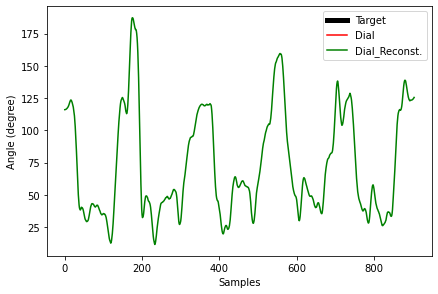

In [61]:
mask = (tmpDF2['PtxID'] == 'kL32782760pb805') &  (tmpDF2['group'] == 'Reward')
dial = tmpDF2[mask]['Dial'].values
target = tmpDF2[mask]['Target'].values

plt.plot(target,'k',linewidth=5)
plt.plot(dial,'r')

dialAnglef = savgol_filter(dialAngle, 19, 2)
# plt.plot(dialAngle,'g')
plt.plot(dialAnglef,'g')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper right')
plt.legend(['Target','Dial','Dial_Reconst.'])
plt.tight_layout()
plt.xlabel('Samples')
plt.ylabel('Angle (degree)')

plt.savefig(path + "/Figures/" + str(np.round(time.time())) + "Dial_Reconstruction.png", dpi = 600)

print(tmpDF2[mask]['trial'].values)

In [29]:
df2 = df

In [30]:
# Testing on how to extract data from the files 
mask = (df2['group'] == 'Reward') & (df2['PtxID'] == 'rN464901337br235') & (df2['index'] == 'headPose') & (df2['trial'] == '0')
val = df2[mask][0].values

vals = str.split(val[0][2],';') 
print(vals)
float(vals[2])

TypeError: 'NoneType' object is not subscriptable

In [31]:
i = 1
print(folderNames[i])
dfs = pd.read_json(path + folderNames[i], orient='index')

1615504136_sC242496828XM468_444_M_R_Reward_1008_50_41_1_.json


In [32]:
dfs

,0
conditionInfo,sC242496828XM468_444_M_R_Reward_1008_50_41_1
headPose,"[-0.387;14.638;-3.409;36.511;337.973;359.937, ..."
handPose,"[-0.564;14.964;-3.588;6.287;295.089;166.829, -..."
fingData,"[0;b_l_thumb1;-0.548;14.386;-3.126;337.061, 0;..."
vfingData,"[0;b_l_thumb1;-0.541;14.388;-3.123;340.665, 0;..."
dialData,"[90.000;89.695;62, 130.556;89.695;62, 130.556;..."
trialTime,"[0.000, 0.017, 0.033, 0.050, 0.066, 0.083, 0.1..."


In [35]:
df_all = df_all.reset_index()

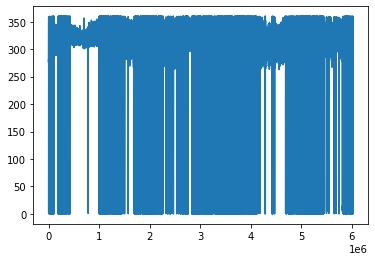

In [36]:
mask = (df_all['Joint'] == "b_l_pinky1")
plt.plot(df_all[mask]['rot'])

# Old Code

In [ ]:
# frame = { 'headPose': dfs.loc['headPose'].values[0], 
#          'handPose': dfs.loc['headPose'].values[0],
#         'fingData': dfs.loc['fingData'].values[0],
#         'vfingData': dfs.loc['vfingData'].values[0],
#         'dialData': dfs.loc['dialData'].values[0],
#         'trialTime': dfs.loc['trialTime'].values[0],}
  
# df_all = pd.DataFrame(frame)

# df_all

In [34]:
# # Extract pose data from each of the metrics 
# frame = []
# joint = []
# xPos = []
# yPos = []
# zPos = []
# rot = []
# for i in np.arange(len(dfs.loc['fingData'].values[0])):
#     metricParts = str.split(dfs.loc['fingData'].values[0][i],';')
#     frame.append(metricParts[0])
#     joint.append(metricParts[1])
#     xPos.append(metricParts[2])
#     yPos.append(metricParts[3])
#     zPos.append(metricParts[4])
#     rot.append(metricParts[5])

# data = {'Fame' : frame,
#        'Joint' : joint,
#        'xPos' : xPos,
#        'yPos' : yPos,
#        'zPos' : zPos,
#        'rot' : rot,}

# df_allTest = pd.DataFrame(data)

# df_allTest

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# f =open("1610062712_Qm559862102iI716_44_M_R__NoReward_1018_165_4.txt")

# # convert the file object to a list so one can work on it 
# mylist = [line.rstrip('\n') for line in f] 

# # convert the list to a long string 
# d = str()
# for i in range(len(mylist)):
#     d += mylist[i]
    
# numVars = 8
# # Separate the string into the different variables (;)
# variables = d.split(";")


# # This part is for loading the fingers
# numFingers = 16
# frameRate = 60.24096
# trialDuration = 15
# numAxis = 4
# fingerNames = ['tmb1','tmb2','tmb3',
#                'idx1','idx2','idx3',
#                'mid1','mid2','mid3',
#                'rng1','rng2','rng3',
#                'pnk1','pnk2','pnk3', 'wrist']

# allFingDF = None 
# allData = None 

# fingerPoses = variables[3].split(":") # Separate the different frames (:)

# # Loopify this part later on to go through all the frames and fingers ...
# for fx in range(len(fingerPoses)):
    
#     if len(fingerPoses[fx]) > 470:
        
#         indifings = fingerPoses[fx].split("|")
#         fings = str().join(indifings).split(",")

#         fingX = 0.0
#         fingY = 0.0
#         fingZ = 0.0
#         fingR = 0.0

#         j = 0
#         fc = 0
#         for i in range(len(fings)-1): # Go through each finger (16) and each axis (4) = 64 data points per frame 
            
#             if j == 0:
#                 fingX = float(fings[i+1])
#             elif j == 1:
#                 fingY = float(fings[i+1])
#             elif j == 2:
#                 fingZ = float(fings[i+1])
#             elif j == 3:
#                 fingR = float(fings[i+1])
            
            
#             j = j+1
#             if j > 3:
#                 tmpResampled = [[fingX,fingY,fingZ,fingR]]
#                 tmpRes = pd.DataFrame(tmpResampled,columns=['Fx','Fy','Fz','Fr'])
#                 tmpRes.insert(0, "Participant_ID", variables[0] , True) # Add participant id to dataframe
#                 tmpRes.insert(0, "Trial", variables[2] , True) # Add trial number to dataframe
                
#                 try:
#                     fingerNameArr = fingerNames[fc]
#                     tmpRes.insert(0, "Digit", fingerNameArr, True) # Add digit name to dataframe
#                 except Exception as e: 
#                     print(e)
                    
#                 tmpRes.insert(0, "Frame", fx, True)
                
#                 if allFingDF is None: 
#                     allFingDF = tmpRes
#                 else:
#                     allFingDF = pd.concat((allFingDF, tmpRes))
                    
#                 j = 0
#                 fc = fc+1


# # Plot
# xval = np.arange(len(allFingDF[allFingDF["Digit"] == "tmb1"].Fx))
# trialTime = len(allFingDF[allFingDF["Digit"] == "tmb1"].Fx)/frameRate
# timeVals = np.linspace(0.0,trialTime,len(xval))

# plt.plot(timeVals,allFingDF[allFingDF["Digit"] == "idx1"].Fr,'r')
# plt.plot(timeVals,allFingDF[allFingDF["Digit"] == "idx2"].Fr,'g')
# plt.plot(timeVals,allFingDF[allFingDF["Digit"] == "idx3"].Fr,'b')
# plt.legend(['Dist','Midial','Prox'])

# plt.xlabel("Time / s")
# plt.ylabel("Joint Bend Angle / degrees")
# plt.title("Proximal Index Joint")
# plt.ylim([250.0, 360.0])



# # This part is for loading everything else
# allData = None 

# armPoses = variables[4].split(":") # Separate the different frames (:)
# headPoses = variables[5].split(":") # Separate the different frames (:)
# dialInfo = variables[6].split(":") # Separate the different frames (:)

# armX, armY, armZ, armRx, armRy, armRz = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
# headX, headY, headZ, headRx, headRy, headRz = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
# dialAngle, targetAngle, Score = 0.0, 0.0, 0.0

# # Loopify this part later on to go through all the frames and fingers ...
# for fx in range(len(armPoses)):
    
#     if len(armPoses[fx]) > 40:
        
#         # Other data start -------------------------
#         arms = str().join(armPoses[fx]).split(",")
#         heads = str().join(headPoses[fx]).split(",")
#         dial = str().join(dialInfo[fx]).split(",")
        
#         try:
#             armX = arms[1]
#             armY = arms[2]
#             armZ = arms[3]
#             armRx = arms[4]
#             armRy = arms[5]
#             armRz = arms[6]
            
#             headX = heads[1]
#             headY = heads[2]
#             headZ = heads[3]
#             headRx = heads[4]
#             headRy = heads[5]
#             headRz = heads[6]
            
#             dialAngle = dial[1]
#             targetAngle = dial[2]
#             Score = dial[3]
            
#             tmpAccumulated = [[armX,armY,armZ,armRx,armRy,armRz, 
#                                headX,headY,headZ,headRx,headRy,headRz,
#                                dialAngle,targetAngle,Score]]
#             tmpDats = pd.DataFrame(tmpAccumulated,columns=['armFx','armFy','armFz','armFRx','armFRy','armFRz',
#                                                            'headFx','headFy','headFz','headFRx','headFRy','headFRz',
#                                                            'DialAngle','TargetAngle','Score'])
            
#             tmpDats.insert(0, "Participant_ID", variables[0] , True) # Add participant id to dataframe
#             tmpDats.insert(0, "Trial", variables[2] , True) # Add trial number to dataframe
#             tmpDats.insert(0, "Frame", fx, True)

#             if allFingDF is None: 
#                 allData = tmpDats
#             else:
#                 allData = pd.concat((allData, tmpDats))
        
#         except Exception as e:
#             print("Something went wrong: ", e)
#         # Other data end -------------------------

# # Plot
# xval = np.arange(len(allData.headFx))
# trialTime = len(allData.headFx)/frameRate
# timeVals = np.linspace(0.0,trialTime,len(xval))

# plt.plot(timeVals,allData.DialAngle,'r')
# plt.plot(timeVals,allData.TargetAngle,'g')
# plt.plot(timeVals,allData.Score,'b')
# plt.legend(['Dial','Target','Score'])
# # plt.legend(['Dial','Target'])

# plt.xlabel("Time / s")
# plt.ylabel("Dial-Target / Degrees")
# plt.title("Performance")